<html>
    <summary></summary>
    <p float="left">
         <div> <p></p> </div>
         <div style="font-size: 20px; width: 800px;">
              <h1>
               <left>Eigen Values, Vectors, Decompositions, and Transformations </left>
              </h1>
              <p><left>============================================================================</left> </p>              
             <pre>Course: BIOM/CBE 480A5, Spring 2025
Instructor: Dr. Brian Munsky
Contact Info: munsky@colostate.edu
Authors: Will Raymond, Dr. Brian Munsky
</pre>
         </div>
    </p>

</html>



<details>
  <summary>Copyright info</summary>

```
Copyright 2023 Brian Munsky

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>

# **1 Learning Objectives**

In this notebook, we will continue our review of linear algebra, and again focuss on several tools in NumPy.  Upon completing this lesson, students will achieve learning objectives to describe several types of matrices and be able to manipulate them in Python.  Specifically, upon finishing this notebook, you should be able to:

* Describe important types of special matrices including ```zero``` matrix, ```identity``` matrix, ```diagonal``` matrix, ```block diagonal``` matrix, ```orthonormal``` matrix, ```unitary``` matrix, ```symmetric``` matrix, and ```positive definite``` matrix.
* Understand the meaning of ```image```, ```range```, ```rank```, ```determinant```, and ```nullspace```, and be able to compute these quantities using NumPy.
* Describe the meaning of ```eigenvalues``` and ```eigenvectors``` and be able to solve for these in Python.
* Be able to use linear algebra operations to ```transform``` data from one set of basis vectors to another.
* Describe the meaning and value of ```singular value decomposition```, and be able to perform ```SVD``` on arrays of data in NumPy.
* Describe the process of ```Principle Component Analysis``` and be able to perform ```PCA``` on numerical data.

We will start again by loading the ```numpy``` modules and some plotting codes in ```matplotlib```.

In [34]:
# First, lets import numpy and matplot lib and set some options for plotting.
import numpy as np
import matplotlib.pyplot as plt

# Plotting style - here we set some options for plotting later in this notebook.
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib.cm as cm
from matplotlib.lines import Line2D
colors = ['#ef476f', '#06d6a0','#7400b8','#073b4c', '#118ab2',]
#colors = ['#fa8174', '#b3de69', '#bc82bd','#ccebc4','#ffed6f','#81b1d2']
font = {'family' : 'monospace',
    'weight' : 'bold',
    'size'   : 12}
plt.rcParams.update({'font.size': 12, 'font.weight':'bold', 'font.family':'monospace'  }   )
plt.rcParams.update({'axes.prop_cycle':cycler(color=colors)})
plt.rcParams.update({'axes.prop_cycle':cycler(color=colors)})
plt.rcParams.update({'axes.prop_cycle':cycler(color=colors)})
plt.rcParams.update({'xtick.major.width'   : 2.8 })
plt.rcParams.update({'xtick.labelsize'   : 12 })
plt.rcParams.update({'ytick.major.width'   : 2.8 })
plt.rcParams.update({'ytick.labelsize'   : 12})
plt.rcParams.update({'axes.titleweight'   : 'bold'})
plt.rcParams.update({'axes.titlesize'   : 10})
plt.rcParams.update({'axes.labelweight'   : 'bold'})
plt.rcParams.update({'axes.labelsize'   : 12})
plt.rcParams.update({'axes.linewidth':2.8})
plt.rcParams.update({'axes.labelpad':8})
plt.rcParams.update({'axes.titlepad':10})  

# **2. Different types of special matrices.**

During the course, we may need to use a few special types of matrices.  The first five are defined by their shapes:

```Zero Matrix```
- **Definition**: A matrix in which all elements are zero.
- **Notation**: Often denoted as $0$.
- **Example**:
  \begin{bmatrix}
  0 & 0 \\
  0 & 0
  \end{bmatrix}


```Identity Matrix```
- **Definition**: A square matrix with ones on the diagonal and zeros elsewhere.
- **Notation**: Often denoted as $I$.
- **Example**:
  \begin{bmatrix}
  1 & 0 \\
  0 & 1
  \end{bmatrix}

```Diagonal Matrix```
- **Definition**: A matrix in which the entries outside the main diagonal are all zero.
- **Example**:
  \begin{bmatrix}
  1 & 0 & 0 \\
  0 & 2 & 0 \\
  0 & 0 & 3
  \end{bmatrix}

```Block Diagonal Matrix```
- **Definition**: A matrix composed of smaller square matrices (blocks) along its diagonal, with zeros elsewhere.
- **Example**:
  \begin{bmatrix}
  A & 0 \\
  0 & B
  \end{bmatrix}
  where $A$ and $B$ are square matrices.

```Symmetric Matrix```
- **Definition**: A square matrix that is equal to its transpose.
- **Property**: (A = A^T).
- **Example**:
  \begin{bmatrix} 
1 & 2 & 3\\
2 & 4 & 5\\
3 & 5 & 6  
\end{bmatrix} 

Two additional important matrices (```Orthonormal``` and ```Unitary```) are defined by the orrientation and magnitude of their collumns.

```Orthonormal Matrix```
- **Definition**: A square matrix whose columns (and rows) are orthonormal vectors (i.e., orthogonal unit vectors).
- **Property**: 
  $\mathbf{Q}^T \mathbf{Q} = \mathbf{Q} \mathbf{Q}^T = \mathbf{I}$
- **Example**:
  \begin{bmatrix} 
1 & 0 & 0\\
0 & \sqrt{1/2}& \sqrt{1/2}\\
0 & \sqrt{1/2}& -\sqrt{1/2}  
\end{bmatrix} 

```Unitary Matrix```
- **Definition**: A complex square matrix whose conjugate transpose is also its inverse.
- **Property**: 
  $\mathbf{U}^* \mathbf{U} = \mathbf{U} \mathbf{U}^* = \mathbf{I}$
- **Example**:
 $$\frac{1}{\sqrt{3}}\begin{bmatrix} 1 & 1 & 1 \\ 1 & e^{2\pi i / 3} & e^{-2\pi i / 3} \\ 1 & e^{-2\pi i / 3} & e^{2\pi i / 3} \end{bmatrix} $$

The final special type of matrix we will use often is a ```Positive Definite Matrix```.

```Positive Definite Matrix```
- **Definition**: A symmetric square matrix for which all eigenvalues are positive.
- **Properties**: 
  1) For any non-zero vector $\mathbf{x}$, the quantity $\mathbf{x}^T \mathbf{A x} > 0$.
  2) A positive definite matrix can be decomposed into the product of a lower triangular matrix and its transpose, ($\mathbf{A} = \mathbf{LL}^T$), where ($\mathbf{L}$) is a lower triangular matrix with *positive* diagonal entries.
- **Example**:
 $$ A = \begin{bmatrix} 2 & -1 & 0 \\ -1 & 2 & -1 \\ 0 & -1 & 2 \end{bmatrix} $$

# **3. Important properties of matrices.**

To introduce a few important properties of square matrices, let's first define a simple 4x4 matrix using numpy.

In [ ]:
# Define a 4 x 4 matrix in numpy
A = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
print(A)

### **3.1. Image (or Range)**
The **image** (or **range**) of a matrix $\mathbf{A}$ is the set of all possible output vectors $\mathbf{b}$ that can be obtained by multiplying $\mathbf{A}$ with some input vector $\mathbf{x}$. Mathematically, it is defined as:
$$
\text{Im}(\mathbf{A}) = \{ \mathbf{b} \in \mathbb{R}^m \mid \mathbf{b} = \mathbf{A} \mathbf{x} \text{ for some } \mathbf{x} \in \mathbb{R}^n \}
$$
The image of $\mathbf{A}$ is a subspace of $\mathbb{R}^m$.

The image of the $\mathbf{A}$ is the space of vectors that are spanned by the columns of the matrix.  Numpy doesn't have a direct means to get the image, but we can write one ourselves.


In [ ]:
# The image of the matrix A is the set of all possible linear combinations of the columns of A.

# Let's use numpy to find a minimal set of vectors to span the image of A
rank_A = np.linalg.matrix_rank(A)
print('The rank of A is:', rank_A)

# The rank of A is 2, so the image of A is spanned by the first two linearly independent columns of A.
# Let's write a simple python function to find these columns.
def find_image(A):
    # Function that takes a matrix A and returns a matrix whose columns span the image of A.
    image_A = A[:,0]
    j = 0
    rank_Image = 1
    while rank_Image < rank_A:
        j += 1
        if rank_Image < np.linalg.matrix_rank(np.vstack((image_A, A[:,j]))):
            image_A = np.vstack((image_A, A[:,j]))
            rank_Image += 1
    return np.array([image_A.T[:,i]/np.linalg.norm(image_A.T[:,i]) for i in range(rank_Image)]).T

print('The image of A is spanned by the columns:\n', find_image(A))

### **3.2. Null Space**
The **null space** (or **kernel**) of a matrix $\mathbf{A}$ is the set of all vectors $\mathbf{x}$ that satisfy the equation $\mathbf{A} \mathbf{x} = \mathbf{0}$. Mathematically, it is defined as:
$$\text{Null}(\mathbf{A}) = \{ \mathbf{x} \in \mathbb{R}^n \mid \mathbf{A} \mathbf{x} = \mathbf{0} \}$$
The null space of $\mathbf{A}$ is a subspace of $\mathbb{R}^n$.

Unfortunately, numpy doesn't have a direct function for null space, so we will wait until we have described eigenvectors to do an example for this one. (Note, scipy.linalg does have such a routine.)


### **3.3 Determinant**
The **determinant** of a square matrix $\mathbf{A}$ is a scalar value that provides important information about the matrix. It is denoted as $\det(\mathbf{A})$ or $|\mathbf{A}|$. The determinant has several key properties:
- It indicates whether the matrix is invertible. A matrix $\mathbf{A}$ is invertible if and only if $\det(\mathbf{A}) \neq 0$.
- It provides information about the volume scaling factor of the linear transformation described by the matrix.
- It can be computed using various methods, including cofactor expansion and row reduction.


For a $2 \times 2$ matrix $\mathbf{A} = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$, the determinant is given by:
$$
\det(\mathbf{A}) = ad - bc
$$

For a $3 \times 3$ matrix $\mathbf{A} = \begin{bmatrix} a & b & c \\ d & e & f \\ g & h & i \end{bmatrix}$, the determinant is given by:
$$
\det(\mathbf{A}) = a(ei - fh) - b(di - fg) + c(dh - eg)
$$

For larger matrices, the determinant can found using the recursive method known as ```cofactor expansion method```.  We will just use numpy routines.

These concepts are fundamental in linear algebra and have wide-ranging applications in various fields of science and engineering.

We will solve for the determinant of our 4x4 matrix from above, but before we do...**Do you know what the determinant is already?**


In [ ]:
# Find the determinant of A.

det_A = np.linalg.det(A)
print('The determinant of A is:', det_A)

# The determinant of A is zero, because we already know that the rank of A is less than the number of columns in A.

## **3.4 Inverse of Square, Full Rank Matrices**

The **inverse** of a matrix $\mathbf{A}$ is another matrix, denoted as $\mathbf{A}^{-1}$, such that when $\mathbf{A}$ is multiplied by $\mathbf{A}^{-1}$, the result is the identity matrix $\mathbf{I}$. Mathematically, this is expressed as:

$$
\mathbf{A} \mathbf{A}^{-1} = \mathbf{A}^{-1} \mathbf{A} = \mathbf{I}
$$

### **Conditions for Invertibility:**
1. **Square Matrix**: Only square matrices (matrices with the same number of rows and columns) can have an inverse.
2. **Non-Singular Matrix**: A matrix $\mathbf{A}$ is invertible if and only if it is non-singular, meaning its determinant is non-zero ($\det(\mathbf{A}) \neq 0$).  In other words, the matrix rank must be equal to its height and width.

### **Finding the Inverse:**
There are several methods to find the inverse of a matrix, including the adjoint method, Gaussian elimination, and using matrix decomposition techniques. Here, we will describe the adjoint method for a $2 \times 2$ matrix and provide a general approach for larger matrices.

#### **Inverse of a $2 \times 2$ Matrix:**
For a $2 \times 2$ matrix $\mathbf{A}$:

$$
\mathbf{A} = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$$

The inverse $\mathbf{A}^{-1}$ is given by:

$$
\mathbf{A}^{-1} = \frac{1}{\det(\mathbf{A})} \begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}
$$

where the determinant $\det(\mathbf{A}) = ad - bc$.

#### **General Method for Larger Matrices:**
For an $n \times n$ matrix $\mathbf{A}$, the inverse can be found using the adjoint method or Gaussian elimination.

1. **Adjoint Method**:
   - Compute the matrix of cofactors.
   - Transpose the matrix of cofactors to get the adjugate (or adjoint) matrix $\mathbf{A}^\text{adj}$.
   - Divide the adjugate matrix by the determinant of $\mathbf{A}$:

   $$
   \mathbf{A}^{-1} = \frac{1}{\det(\mathbf{A})} \mathbf{A}^\text{adj}
   $$

2. **Gaussian Elimination**:
   - Augment the matrix $\mathbf{A}$ with the identity matrix $\mathbf{I}$ to form $[ \mathbf{A} | \mathbf{I} ]$.
   - Perform row operations to transform $\mathbf{A}$ into the identity matrix.
   - The resulting augmented matrix will be $[ \mathbf{I} | \mathbf{A}^{-1} ]$.

### **Example:**
Consider the matrix:

$$
\mathbf{A} = \begin{bmatrix}
4 & 7 \\
2 & 6
\end{bmatrix}
$$

1. **Determinant**:
   $$
   \det(\mathbf{A}) = 4 \cdot 6 - 7 \cdot 2 = 24 - 14 = 10
   $$

2. **Inverse**:
   $$
   \mathbf{A}^{-1} = \frac{1}{10} \begin{bmatrix}
   6 & -7 \\
   -2 & 4
   \end{bmatrix} = \begin{bmatrix}
   0.6 & -0.7 \\
   -0.2 & 0.4
   \end{bmatrix}
   $$

### **Python Example:**
Here is how you can compute the inverse of a matrix using NumPy in Python:

In [ ]:
# Define the matrix
A = np.array([[4, 7], [2, 6]])

# Compute the inverse
A_inv = np.linalg.inv(A)

print("Inverse of A:\n", A_inv)

# **4. Eigenvalues and Eigenvectors of Square Matrices**

**Eigenvalues** and **eigenvectors** are fundamental concepts in linear algebra with numerous applications in various fields such as physics, engineering, computer science, and data analysis.

## **4.1. Definition of Eigenvalue-Eigenvector pairs:**
- **Eigenvector**: An eigenvector of a square matrix **A** is a non-zero vector **v** such that when **A** is multiplied by **v**, the result is a scalar multiple of **v**. Mathematically, this is expressed as:
  $$
  \mathbf{A} \mathbf{v} = \lambda \mathbf{v}
  $$
  where **v** is the eigenvector and $\lambda$ is the corresponding eigenvalue.

- **Eigenvalue**: An eigenvalue $\lambda$ is a scalar that satisfies the above equation for a given eigenvector **v**.

## **4.2. Finding Eigenvalues and Eigenvectors:**
1. **Characteristic Equation**: To find the eigenvalues of a matrix **A**, solve the characteristic equation:
   $$
   \det(\mathbf{A} - \lambda \mathbf{I}) = 0
   $$
   where $\det()$ is an operation that returns the determinant, and **I** is the identity matrix of the same dimension as **A**.

2. **Eigenvectors**: Once the eigenvalues are found, the corresponding eigenvectors can be determined by solving the equation $ (\mathbf{A} - \lambda \mathbf{I})\mathbf{v} = 0 $ for each eigenvalue $\lambda$.


## **4.3. Computing Eigenvalues and Eigenvectors in Numpy**
Numpy provides some simple codes to calculate the 

| Method    | Description  | Examples  
| ----------- | ----------- | ------------ |
| np.linalg.eig | returns the eigen vectors and values of a matrix| |  
| np.linalg.eigvals | returns the eigenvalues of a matrix |

For a more in depth explanation  check out the following youtube video: ["Eigenvectors and eigenvalues | Chapter 14, Essence of linear algebra"](https://www.youtube.com/watch?v=PFDu9oVAE-g)

## **4.4. Example Eigenvalue/Vector Calculations**

Let's do some eigenvalue examples, and as we do so let's learn some important facts about the eigenvalues of common matrices.

### **Eigenvalues of diagonal matrices.**

In [2]:
# Explore the eigenvalues and eigenvectors of diagonal matrices.
# Define a diagonal matrix
D = np.diag([1, 2, 3, 4])

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(D)

print("Eigenvalues of D:\n", eigenvalues)
print("Eigenvectors of D:\n", eigenvectors)

# Note, for diagonal matrices, the eigenvalues are the just thediagonal entries of the 
# matrix, and the eigenvectors are the standard basis vectors.

Eigenvalues of D:
 [1. 2. 3. 4.]
Eigenvectors of D:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


### **Eigenvalues for lower or upper triangular matrices**

In [3]:
# Let's see what we get as the eigenvalues and eigenvectors of a lower triangular matrix.
# Define a lower triangular matrix
L = np.array([[1, 0, 0], [2, 3, 0], [4, 5, 6]])
print('Our lower triangular matrix L is:\n', L)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(L)

print("Eigenvalues of L:\n", eigenvalues)
print("Eigenvectors of L:\n", eigenvectors)

# The eigenvalues of a lower triangular matrix are the diagonal entries of the matrix. 
# The matrix formed by the eigenvectors can also be arranged to be lower triangular.

Our lower triangular matrix L is:
 [[1 0 0]
 [2 3 0]
 [4 5 6]]
Eigenvalues of L:
 [6. 3. 1.]
Eigenvectors of L:
 [[ 0.          0.          0.70014004]
 [ 0.          0.51449576 -0.70014004]
 [ 1.         -0.85749293  0.14002801]]


### **Eigenvalues for symmetric matrix**

For a ```symmetric matrix```, all eigenvalues are real, and the eigenvectors form an ```orthonormal matrix```.

In [ ]:
# Create a random symmetrix matrix
random_matrix = np.random.randn(4,4)
random_matrix = random_matrix+random_matrix.T

# compute eigenvalue/eigenvector pairs
eigenvals, eigenvecs = np.linalg.eig(random_matrix)

print('Random symmetric matrix:')
print(random_matrix)

print('\nEigenvectors:')
print(eigenvecs)
print('\nEigenvalues:')
print(eigenvals)

# Note that for symmetric matrices, the eigenvalues and eigenvectors are always real. 

# Let's check that the eigenvectors are orthonormal.
print('Check that eigenvectors are orthonormal:')
print(f'eigenvecs.T @ eigenvecs:\n{eigenvecs.T @ eigenvecs}')

### **Using Eigenvalues and Eigenvectors to Determine the Image and Nullspace of a Matrix**

In [ ]:
# Let's look at the 4x4 matrix A from above.
A = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
print('Matrix A:\n', A)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues of A:\n", eigenvalues)
print(f'The rank of A is: {np.linalg.matrix_rank(A)}')
print(f'The number of non-zero eigenvalues of A is: {np.count_nonzero(abs(eigenvalues)>1e-10)}')
# The rank of A is 2, and the number of non-zero eigenvalues of A is 2.

# The range of A is spanned by the eigenvectors corresponding to the non-zero eigenvalues of A.
print(f'The range of A is spanned by:\n {eigenvectors[:,abs(eigenvalues)>1e-10]}')

# The null space of A is spanned by the eigenvectors corresponding to the zero eigenvalues of A.
print(f'The null space of A is spanned by:\n {eigenvectors[:,abs(eigenvalues)<1e-10]}')

In [ ]:
# Let's check that the eigenvectors are orthogonal to each other.
print('The dot product of the eigenvectors is:\n', np.dot(eigenvectors.T, eigenvectors))

In [ ]:
# Let's check that the nullspace eigenvectors are orthogonal to the image that we
# computed earlier.
image_A = find_image(A)
nullspace_A = eigenvectors[:,abs(eigenvalues)<1e-10]
print('The dot product of the image and nullspace eigenvectors is:\n', np.dot(image_A.T, nullspace_A))
print('All the dot products are zero, so the image and nullspace eigenvectors are orthogonal to each other.')

### **Common Eigenvalue/Eigenvector Applications:**
- **Stability Analysis**: In systems of differential equations, eigenvalues can determine the stability of equilibrium points.
- **Principal Component Analysis (PCA)**: In data analysis, eigenvectors of the covariance matrix represent the principal components.
- **Quantum Mechanics**: Eigenvalues and eigenvectors are used to solve the Schrödinger equation.

Eigenvalues and eigenvectors provide deep insights into the properties of linear transformations and are essential tools in both theoretical and applied mathematics. Later in the course, we will use them both for data analysis as well as for solving large sets of linear ODEs.

# **3. Linear Transformations**

A ```linear transformation``` is a simple linear operation that transforms a vector from one  basis vector space (i.e., where all basis vectors are orthogonal to one another) to another, potentially more convenient cordinate definition.  

To achieve such a transformation, we can multiply any vector in the original coordinate system by a orthogonal matrix (a matrix whose collumns are orthogonal to one another).

For example, suppose that we examine a point in 2D denoted by [x,y] in the regular cartesian coordinate system. We can rotate this coordinate systme about the origin [0,0] by an angle $\theta$ (defined as positive in the counter clockwise direction), using the linear transformation:

$\begin{bmatrix}
x'\\
y'
\end{bmatrix} =
\begin{bmatrix}
\cos(\theta) & -\sin(\theta)\\
\sin(\theta) & \cos(\theta) \\
\end{bmatrix} * \begin{bmatrix}
x\\
y
\end{bmatrix}
$

You chould confirm on your own that this transformation matrix is indeed a orthonormal matrix (i.e., that all columns are orthogonal and have magnitude of one) by showing that if $\mathbf{v}_i$ and $\mathbf{v}_j$ are both columns of the transformation matrix, then the dot product $\mathbf{v}_i\cdot \mathbf{v}_j$ is one if $i=j$ and zero if $i\ne j$. 

In [ ]:
# Generate a large number of random 2D points
xy = np.random.randint(0,100,size=(2,100)) # a random constellation of points at integer values

# Choose a central point for rotation
center = np.array([[30],[15]]) # axis of rotation

# Perform rotation at three different angles
thetas = [.02, .1, .2]

# Define the transformation matrix for our 2D rotation
transformation_mat = lambda theta: np.array([[np.cos(theta), -np.sin(theta)],
                                            [np.sin(theta),  np.cos(theta)]])

# We are going to translate the points to the new center point, 
# then apply the transformation matrix application of the rotation:  
# A^-1 (2x2) @ (xy (100x2)- rotation point (2x1)).T (2 x 100)
new_xy1 = transformation_mat(thetas[0]) @ (xy - center) + center
new_xy2 = transformation_mat(thetas[1]) @ (xy - center) + center
new_xy3 = transformation_mat(thetas[2]) @ (xy - center) + center

# Now to plot our results:
plt.plot(center[0], center[1], 'x')
plt.scatter(*xy)
plt.scatter(*new_xy1)
plt.scatter(*new_xy2)
plt.scatter(*new_xy3)
plt.legend(['center', 'original','.02 rad', '.1 rad', '.2 rad'], bbox_to_anchor=(1.05, 1.05))
plt.title('rotating a 100 2D points w/ rotation matrix')

### **Combining multiple sequential transformation steps**
Notice in the previous example, that we had to take three steps: 
*(1) we translated the data to place the center of rotation at (0,0), 
*(2) we rotated all the vectors about the origin (0,0), and then 
*(3) we translated back to the original origin.
 
 With clever application of linear algebra, we can do all three of these steps in one go using an Affine Transformation Matrix which can be constructed as the product of multiple transformation matrixes. 

First, we define the initial translation:
$
M1 = \begin{bmatrix}
1 & 0 & -\Delta x\\
0 & 1 & -\Delta y\\
0 & 0 & 1
\end{bmatrix}$

Here the first row describes how $x$ changes, the second row describes how $y$ changes, and the third row shows how a hidden third variable changes. You could think of this as $z$ or a bias magnitude - either way, it will remain constant at one.  Similarly, the first column is how the new coordinate **depends** on $x$, the second is how the new coordinate depends on $y$ and the third how it depends on the bias.  Because this just a simple shift, $x$ and $y$ take on thier original values plus a multiple of the bias term.

Next, we define the rotation about the origin.
$M2 = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0\\
\sin(\theta) & \cos(\theta) & 0\\
0 & 0 & 1
\end{bmatrix}$

In the second transformation, the $x$ and $y$ coordinates are rotated independent of the $z$/bias term.

Third, we define the final translation.
$
M3 = \begin{bmatrix}
1 & 0 & \Delta x\\
0 & 1 & \Delta y\\
0 & 0 & 1
\end{bmatrix}$

This translation term is the same as the first one, but its bias-shift now has the opposite sign.

 We have to keep that order here too when we apply these transformation matrices, so the entire transformation is $MT = M3\cdot M2\cdot M1$ (note this reads from right to left).

Applying the transformation to a set of points:

$\begin{bmatrix}
x'\\
y'\\
1
\end{bmatrix} =
M3\cdot M2 \cdot M1 \cdot \begin{bmatrix}
x\\
y\\
1
\end{bmatrix}
$

You can try other affine transformation matrices as well -- but for now we are just demonstrating the common linear algebra transformation in ```numpy```.

In [ ]:
# Let's try it:  First, we add in a column of 1s to our x,y constellation so now its 3x100:
print(len(xy[0,:]))

# Create a matrix with the x-values in the first row, y-values in the second row, 
# and 1s in the third row. You could think of the third row as either the z-values
# in 3D space, or as a row of 1s that will allow us to add a bias term to our
# linear transformation.
xy_appended = np.vstack([xy, np.ones([1,len(xy[0,:])])])

# The transformation matrix for the initial bias shift.
M1 = lambda rx, ry, theta: np.array([[1, 0, -rx],
                                    [0,  1, -ry],
                                    [0,  0,  1]])

# The transformation matrix for the rotation.
M2 = lambda rx, ry, theta: np.array([[np.cos(theta), -np.sin(theta), 0],
                                    [np.sin(theta), np.cos(theta), 0],
                                    [0,              0,             1]])

# The transformation matrix for the final bias shift.
M3 = lambda rx, ry, theta: np.array([[1, 0, rx],
                                    [0,  1, ry],
                                    [0,  0,  1]])

# Create a lambda function that will apply all three transformations.
MT = lambda rx, ry, theta: M3(rx,ry,theta)@M2(rx,ry,theta)@M1(rx,ry,theta)

#Set the center point about which to rotate: 
rx = center[0,0]
ry = center[1,0]

#Set the angle to rotate counter-clockwise (radians)
theta = 0.2

# Apply the transformation matrix to the appended matrix of points.
xy_translated = MT(rx,ry,theta) @ xy_appended

# Now to plot our results:
plt.plot(rx, ry, 'x')
plt.scatter(*xy_appended[:2]) # only plot along the first two dimensions
plt.scatter(*xy_translated[:2])
plt.scatter(new_xy3[0,:],new_xy3[1,:],marker='.')

plt.legend(['center', 'original',f'{theta} rad (new approach)',f'{theta} rad (old approach)'], bbox_to_anchor=(1.05, 1.05))
plt.title('rotating a 100 2D points w/ affine rotation matrix')

# **3. Singular Value Decomposition and Principle Component Analysis**

```Singular value decomposition``` is an efficient linear algebra method that generalizes the eigenvalue-eigenvector decomposition from above to allow similar decompositons to be performed on rectangular matrices (e.g., like large data sets). SVD decomposes a $m\times n$ matrix $\mathbf{X}$ as 
$\mathbf{X} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^T,$
where:

* $\mathbf{U}$ is an ```orthonormal``` matrix containing the ```left singular vectors``` of $\mathbf{X}$.  The columns of $\mathbf{U}$ are the eigenvectors of the symmetric matrix $\mathbf{X}^T\mathbf{X}$.
* $\boldsymbol{\Sigma}$ is a diagonal matrix with ```singular values``` on the diagonal. The non-zero entries are the square roots of the non-zero eigenvalues of $\mathbf{X}^T\mathbf{X}$￼ (which overlap with those for $\mathbf{X}^T\mathbf{X}$).
* $\mathbf{V}^T$ is the transpose of an orthogonal matrix containing the ```right singular vectors``` of $\mathbf{X}$. The columns of $\mathbf{V}$ are the eigenvectors of the symmetric matrix $\mathbf{X}\mathbf{X}^T$.

### **Applications of SVD:**
1. **Dimensionality Reduction**: SVD is used in Principal Component Analysis (PCA) to reduce the dimensionality of data while preserving as much variance as possible.
2. **Image Compression**: SVD can be used to approximate images with fewer singular values, reducing storage requirements while maintaining image quality.
3. **Signal Processing**: SVD is used to filter noise from signals and to identify underlying patterns.
4. **Least Squares Problems**: SVD provides a stable method for solving linear least squares minimization problems (i.e., solving for the best fit of overdetermined sets of linear equations).

Later in the course, we will use SVD for all of these tasks.

### **Example of SVD:**
Consider the matrix:

$$
\mathbf{A} = \begin{bmatrix}
1 & 0 & 0 & 0 & 2 \\
0 & 0 & 3 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 4 & 0 & 0 & 0
\end{bmatrix}
$$

The SVD of $\mathbf{A}$ is:

$$
\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T
$$
and can be found in python using the following commands:

In [35]:
# Example showing how to compute the SVD of a matrix in numpy.
# Define the matrix
A = np.array([
    [1, 0, 0, 0, 2],
    [0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 4, 0, 0, 0]
])

# Compute the SVD
U, Sigma, Vt = np.linalg.svd(A, full_matrices=True)
print('SVD Results using the full_matrices=True option:')
print("U:\n", U)
print("Sigma:\n", Sigma)
print("Vt:\n", Vt)

SVD Results using the full_matrices=True option:
U:
 [[ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [-1.  0.  0.  0.]]
Sigma:
 [4.         3.         2.23606798 0.        ]
Vt:
 [[ 0.         -1.          0.          0.          0.        ]
 [-0.          0.          1.         -0.          0.        ]
 [ 0.4472136  -0.         -0.         -0.          0.89442719]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


In [36]:
# Compute the SVD using the reduced form
U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)
print('\nSVD Results using the full_matrices=False option:')
print("U:\n", U)
print("Sigma:\n", Sigma)
print("Vt:\n", Vt)


SVD Results using the full_matrices=False option:
U:
 [[ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [-1.  0.  0.  0.]]
Sigma:
 [4.         3.         2.23606798 0.        ]
Vt:
 [[ 0.         -1.          0.          0.          0.        ]
 [-0.          0.          1.         -0.          0.        ]
 [ 0.4472136  -0.         -0.         -0.          0.89442719]
 [ 0.          0.          0.          1.          0.        ]]


In [37]:
# Let's check that the SVD is correct by reconstructing the matrix A.
A_reconstructed = U @ np.diag(Sigma) @ Vt
print('\nReconstructed matrix A:\n', A_reconstructed)

# Check and see that this matches the original matrix A!


Reconstructed matrix A:
 [[1. 0. 0. 0. 2.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0.]]


## **Principle Component Analysis**
```Principal component analysis ```(PCA) is a specific linear transformation that chooses a set of ordered basis vectors (i.e., a new coordinate system) where each orthoganal axis is a "Principal Component," usually arranged in an order such that each new vector captures the next greatest percentage of variation in the given dataset.  In other words, the first principal component is the direction that has the most variation, the second has the next most, etc.  PCA is efficiently solved using the technique of SVD.

### **Steps to Perform PCA Using SVD**

Here are the steps to perform PCA using SVD directly on the data matrix:

1. **Standardize the Data**:
   - Center the data by subtracting the mean of each feature.
   - Optionally, scale the data to have unit variance.  This is important when different measurements in the data have very different scales

2. **Perform Singular Value Decomposition (SVD)**:
   - Decompose the centered data matrix using SVD to obtain the matrices $\mathbf{U}$, $\mathbf{\Sigma}$, and $\mathbf{V}^T$.

3. **Select Principal Components**:
   - Choose the top $k$ singular values and their corresponding singular vectors to form the principal components.

4. **Transform the Data**:
   - Project the original data onto the selected principal components to obtain the reduced-dimensional representation.

### **Example using SVD and PCA to Transform Data**
We can use SVD to obtain the largest orthonormal eigenbasis for any m x n matrix, which is precisely the operation needed to perform PCA! We will show two implementations below, but first we need some data!

A 2D multivariate gaussian is one of the best ways to visualize this particular transformation (without dimensionality reduction)! So let's generate one:

In [50]:
# Let's start by defining some functions to use for our PCA implementation.
# Step 1: Standardize the data
def normalize_data(X):
    mean = np.mean(X, axis=0)
    X_centered =(X - mean)
    return X_centered, mean

# Step 2: Perform SVD
def perform_svd(X_centered):
    U, Sigma, Vt = np.linalg.svd(X_centered, full_matrices=False)
    return U, Sigma, Vt

# Step 3: Select principal components
def select_principal_components(Vt, k):
    V_k = Vt.T[:, :k]
    return V_k

# Step 4: Transform the data
def transform_data(X_centered, V_k):
    X_reduced = np.dot(X_centered, V_k)
    return X_reduced

(-10.0, 10.0)

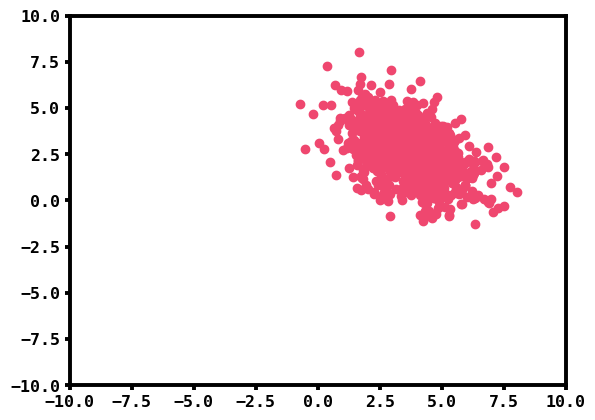

In [51]:
# Specify some parameters to define our distribution:
mu = np.array([3.6,2.7])
sig = np.array([[2,-1],[-1,2]])

# Generate random data from multivariate gaussian:
random_gaussian = np.random.multivariate_normal(mu,sig, size=(1000))

# Plot the data:
plt.scatter(random_gaussian[:,0], random_gaussian[:,1])
plt.xlim([-10,10])
plt.ylim([-10,10])

(-10.0, 10.0)

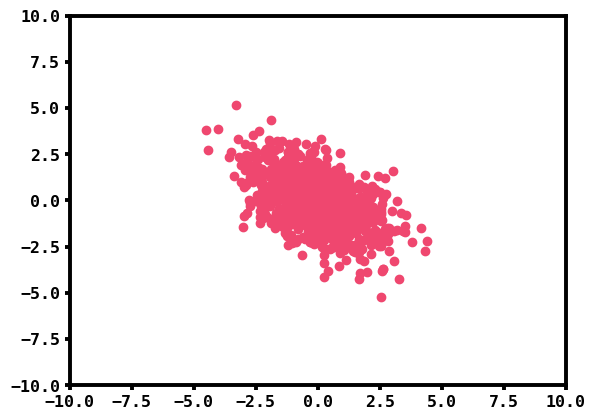

In [40]:
# PCA using  SVD

# PCA requires CENTERED data (zero mean), so let's subtract the mean:
centered_gaussian, meandata = normalize_data(random_gaussian)

# Let's plot the recenterred data
plt.scatter(centered_gaussian[:,0], centered_gaussian[:,1])
plt.xlim([-10,10])
plt.ylim([-10,10])


In [41]:
# Perform the SVD:
U, Sigma, Vt = perform_svd(centered_gaussian)

# This results in:
# U = unitary matrix (possibly complex) for the range (columns space) of the matrix. 
# Sigma = singular values (non-negative real values)
# Vt = unitary matrix (possibly complex) for the 

print(f'The shape of U is: {U.shape}')
print(f'The shape of Sigma is: {Sigma.shape}')
print(f'The shape of Vt is: {Vt.shape}')

The shape of U is: (1000, 2)
The shape of Sigma is: (2,)
The shape of Vt is: (2, 2)


Text(0.5, 1.0, 'Data in New Coordinates')

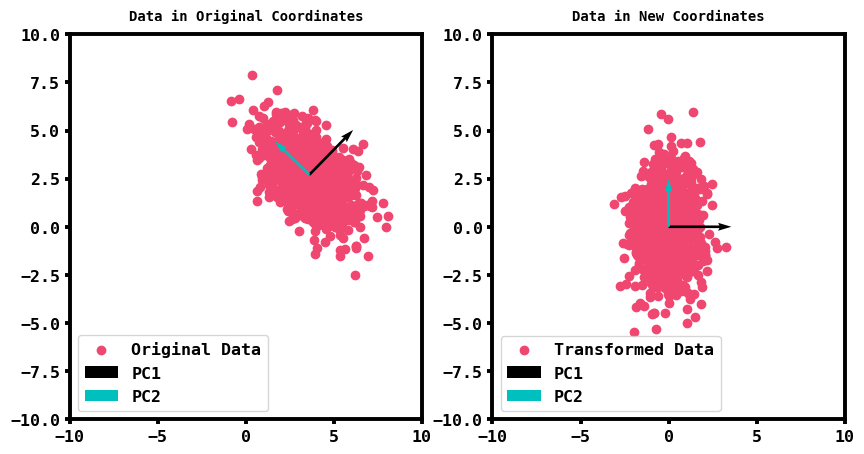

In [42]:
# Now let plot the transformed data on the new basis:
X_new = centered_gaussian @ Vt # transform our original data after being centered

# Make a set of two plots side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(random_gaussian[:,0], random_gaussian[:,1])
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.quiver(*mu, *Vt[:,0], color=['k'], scale=np.sqrt(Sigma[1]))
plt.quiver(*mu, *Vt[:,1], color=['c'], scale=np.sqrt(Sigma[0]))
plt.legend(['Original Data','PC1','PC2'])
plt.title('Data in Original Coordinates')

plt.subplot(1,2,2)
plt.scatter(X_new[:,0], X_new[:,1])
plt.xlim([-10,10])
plt.ylim([-10,10])
#plot the eigen vectors by their eigen values!
plt.quiver(*np.mean(X_new,axis=0), *(np.eye(2))[:,0], color=['k'], scale=np.sqrt(Sigma[1]))
plt.quiver(*np.mean(X_new,axis=0), *(np.eye(2))[:,1], color=['c'], scale=np.sqrt(Sigma[0]))
plt.legend(['Transformed Data','PC1','PC2'])
plt.title('Data in New Coordinates')

Note how the original gaussian has been placed on its 2 new axes by rotating the original data. The new data looks like an ellipse with its longest direction in PC1 and its smaller direction in PC2.Both the original data and its transformation were in two dimensions, so the actual shape of the data cloud does not apper to have changed.

## **Using PCA to reduce data dimension**

The power of PCA is in how it hands much larger dimensional data.  The approach will still rotate the data so that the largest variation is about PC1, then PC2, etc., but now that rotation can be about a much larger number of axes.  

Let's apply PCA to a larger dimensional data set, but this time instead of keeping the whole result, we will only keep the first few dimensions of the PCA. 

Our reconstruction will be imperfect, but we can calculate the exact amount of variance captured by including each axis so we can stop once we have collected enough of the differences.

In [43]:
# Let's start by creating a more complesdata set that contains a mixture of two different 
# types of multivariate random variables each with slightly different means and variances.:

# We start by creating a random mean and covariance matrix for the two types of random variables.
nVariables = 20

# Let's generate a pair of random means for two types of data
mn1 = np.random.rand(nVariables)
mn2 = np.random.rand(nVariables)

# Let's also generate a pair of random covariance matrices.
sig1 = np.cov(np.random.rand(nVariables,6))
sig2 = np.cov(np.random.rand(nVariables,6))

# Next, we generate many samples from each distribution:
nSamples = 1000
samples1 = np.random.multivariate_normal(mn1,sig1,size=nSamples)
samples2 = np.random.multivariate_normal(mn2,sig2,size=nSamples)

# Now to combine the two data sets into a single normalized data set:
X = np.vstack([samples1,samples2])
std = np.sqrt(np.var(X,axis=0))
X = (X-np.mean(X,axis=0))/std

Text(0.5, 1.0, 'Two Sets of Random Variables (Our original data)')

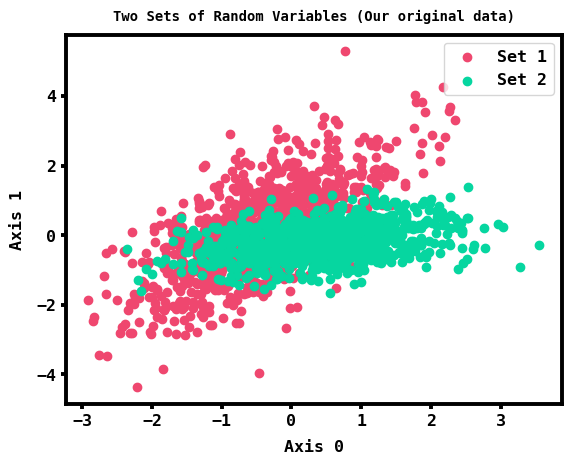

In [44]:
# Now, let's plot these two sample sets on a couple of their axes:
ax0 = 0
ax1 = 1
plt.scatter(X[:1000,ax0], X[:1000,ax1])
plt.scatter(X[1000:,ax0], X[1000:,ax1])
plt.legend(['Set 1','Set 2'])
plt.xlabel(f'Axis {ax0}')
plt.ylabel(f'Axis {ax1}')
plt.title('Two Sets of Random Variables (Our original data)')

# Note that the two data types are similar but not exactly the same.
# Try different combinations to see if you can separate out the two colors.

Now we can "Select" components by keeping only the first few PCA coordinates. 

Using only the first two components (first 2 indexes) of each matrix will let us construct some $\hat{X}$ that is a lossy representation of our original data, $X$. Play with the number of components included, and see how the error of $\hat{X}$ vs $X$ changes in relation to number of components used!

We can also calculate the explained variance by squaring the sum of the singular values kept divided by the total singular values squared!

$ Explained\: Variance = S[:N_{components}]^2 / S^2$

MSE transformed data to original data:
6306.394883676867

Total explained variance of components: [0, 1, 2, 3, 4]
84.23401279080785 %

reduced dimension:
(2000, 5)


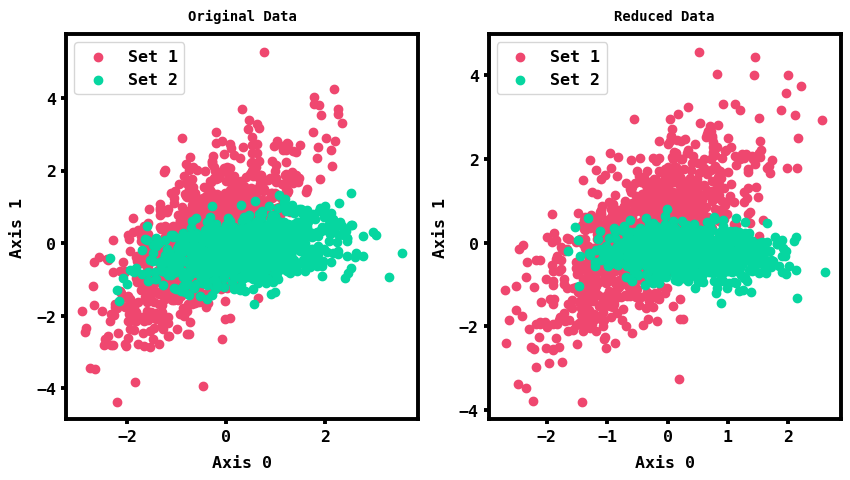

In [45]:
# Compute the SVD transformation of the zero-mean data:
U, S, V = np.linalg.svd(X) #single value decomp with numpy

components = [0,1,2,3,4]
X_hat = U[:,components] @ (np.diag(S[components]) @ V[components,:]) # apply the transformation to the data
explained_variance = np.sum(S[components]**2/np.sum(S**2))
X_reduced = (X @ V[components,:].T)

# Let's plot the original and transformed data on two different axes:
ax0 = 0
ax1 = 1
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:1000,ax0], X[:1000,ax1])
plt.scatter(X[1000:,ax0], X[1000:,ax1])
plt.legend(['Set 1','Set 2'])
plt.xlabel(f'Axis {ax0}')
plt.ylabel(f'Axis {ax1}')
plt.title('Original Data')

plt.subplot(1,2,2)
plt.scatter(X_hat[:1000,ax0], X_hat[:1000,ax1])
plt.scatter(X_hat[1000:,ax0], X_hat[1000:,ax1])
plt.legend(['Set 1','Set 2'])
plt.xlabel(f'Axis {ax0}')
plt.ylabel(f'Axis {ax1}')
plt.title('Reduced Data')

print('MSE transformed data to original data:')
print(np.sum(np.subtract(X_hat, X)**2))
print('')
print(f'Total explained variance of components: {components}')
print('{} %'.format(explained_variance*100))
print('')
print('reduced dimension:')
print(X_reduced.shape)


Let's look at how much of the variance can be retained as a function of the number of principle components are retained.

Text(0.5, 1.0, 'Cumulative Variance Explained by Components')

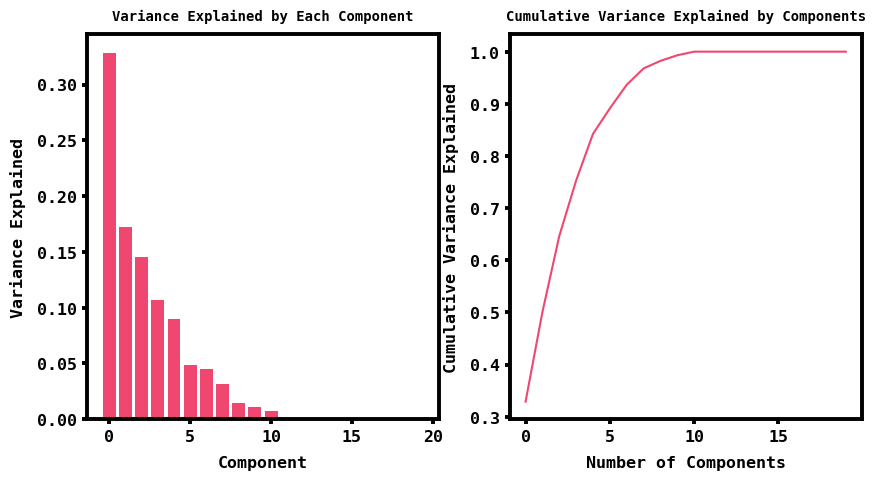

In [46]:
# Plotting the variance explained by each component.
# Here we will make two plots.  The first will show the variance explained by each component,
# and the second will show the cumulative variance explained by the components.
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(np.arange(len(S)), S**2/np.sum(S**2))
plt.xlabel('Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each Component')

plt.subplot(1,2,2)
plt.plot(np.cumsum(S**2/np.sum(S**2)))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Components')


So by keeping just a few principal components, we are able to reconstruct most of the variations in our data! Another way of saying this is that we can effectively reduce the dimension of our data set and keep track of how much information we lose.  

## **Using PCA to explore differences in populations**

One of the main uses of PCA is to serve as a visual means to explore differences within a data set.  Unfortunately, it is very difficult for our minds to comprehend high dimensional data.  In order to interpret data, we need to transform it into 1-, 2- or 3-dimensional figures (you can also use time and colors, but interpretation gets more difficult).

Let's see what our data looks like in just the first two principle components.

Text(0.5, 1.0, 'Transformed Data')

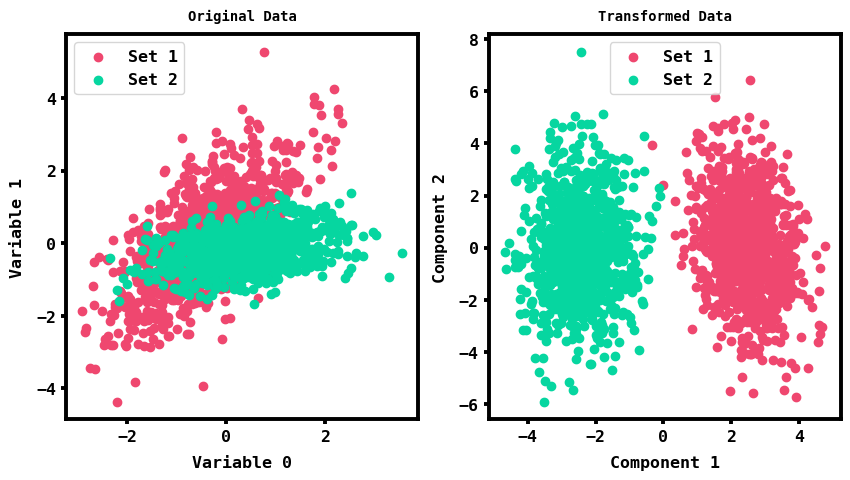

In [47]:
# Plotting our reduced representation based on the first 2 components
components = [0,1]  # Pick which components to include.
X_reduced = X @ V[components,:].T # Project data onto the

# Plot the original and reduced data on two separate axes.
ax0 = 0
ax1 = 1
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:1000,ax0], X[:1000,ax1])
plt.scatter(X[1000:,ax0], X[1000:,ax1])
plt.xlabel(f'Variable {ax0}') 
plt.ylabel(f'Variable {ax1}')
plt.legend(['Set 1','Set 2'])
plt.title('Original Data')

plt.subplot(1,2,2)
plt.scatter(X_reduced[:1000,0], X_reduced[:1000,1])
plt.scatter(X_reduced[1000:,0], X_reduced[1000:,1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(['Set 1','Set 2'])
plt.title('Transformed Data')

Notice any trends? 

Try adjusting the axes (```ax0```, ```ax1```) of the original data to see if you could have done as well by just choosing which axes to plot. Some will do better than others, but it is a lot of work.

Using the first few PCA vectors, it is much easier to distinguish between the two data types. Later in the course we will explore this for classification of different types of data.

## **Questions and practice**
You should now be able to complete problems 12 and 13 in Homework 2, and also try the following on your own.

In [48]:
## Apply a scaling affine transformation matrix to a constellation of points.  This transformation should
## scale (i.e. strectch or compress) the points in the x and y directions relative to some spatially fixed 
## origin point. 
## Hint: [ Scaling x   0       -rx ]
##       [ 0       Scaling y   -ry ]
##       [ 0           0         1 ]

In [49]:
## Apply SVD to an image, then reconstruct the image with varying amounts of singular values
## What do you notice about using more singular values for reconstruction vs less?
## How does the "quality" of the reconstructed image relate to the explained variance?
## Hint: You may have to apply SVD to each channel if you are using a H x W x Color image.